#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import itertools

In [2]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from random import random
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения

In [3]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data_m = data.copy().resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [5]:
data_m.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,32108.628796,2009.84000,6.420000,15.645434,2.475000,179.905434,26.140008,2.996992,11.499990,0.027135,0.026964,0.027152
std,3534.668371,4.82606,3.444258,1.084200,1.116066,104.903962,14.634509,0.115045,0.017667,0.022668,0.022522,0.022681
min,26314.458333,2002.00000,1.000000,1.530612,1.000000,16.000000,2.741935,2.530612,11.265306,0.000000,0.000000,0.000000
25%,29193.559812,2006.00000,3.000000,15.500000,1.000000,76.008748,11.702145,2.903226,11.500000,0.000000,0.000000,0.000000
50%,31879.175067,2010.00000,6.000000,16.000000,2.000000,167.500000,24.666667,3.000000,11.500000,0.032258,0.032258,0.032258
75%,34574.729839,2014.00000,9.000000,16.000000,3.000000,259.500000,37.800000,3.095967,11.500000,0.033621,0.033333,0.033621
max,40603.403226,2018.00000,12.000000,16.020188,4.000000,351.000000,51.000000,3.193548,11.515478,0.066759,0.066759,0.066759


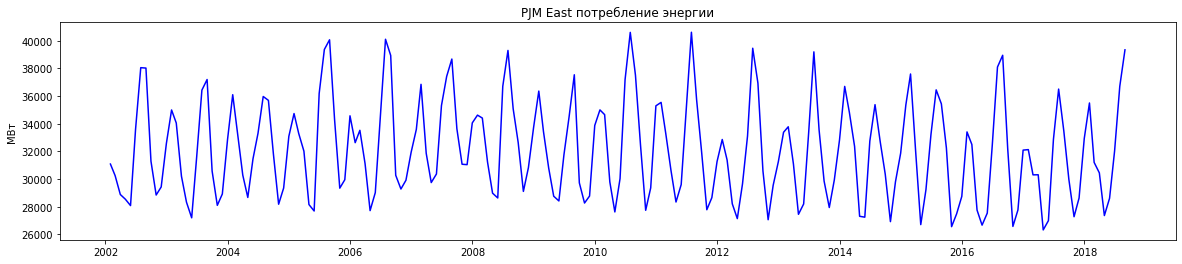

In [6]:
plt.figure(figsize =(20,4))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

#### 2. Подберите параметры модели SARIMAX для этого ряда.


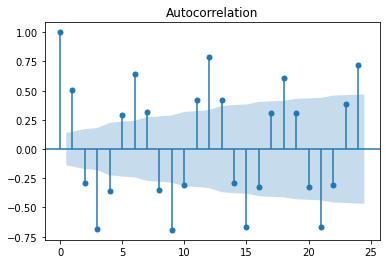

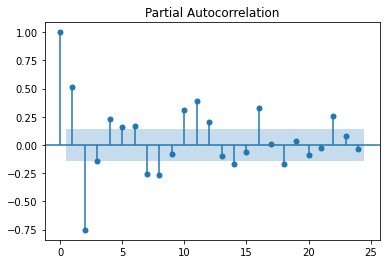

In [8]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

In [9]:
# Определим p, d и q 
q = 2
p = 0
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с годовыми данными, тогда сезонность это 1 год
qs = 2
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs , 12] 

In [10]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [0, 1, 2]    : ps,ds,qs, S= [0, 0, 2, 12]


In [11]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
#N1 =1   # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 1, 2]x[0, 0, 2, 12] - AIC:2909.891431206285


In [12]:
print(results.summary().tables[0],results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1449.946
Date:                            Sun, 08 Nov 2020   AIC                           2909.891
Time:                                    14:18:19   BIC                           2925.267
Sample:                                         0   HQIC                          2916.135
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

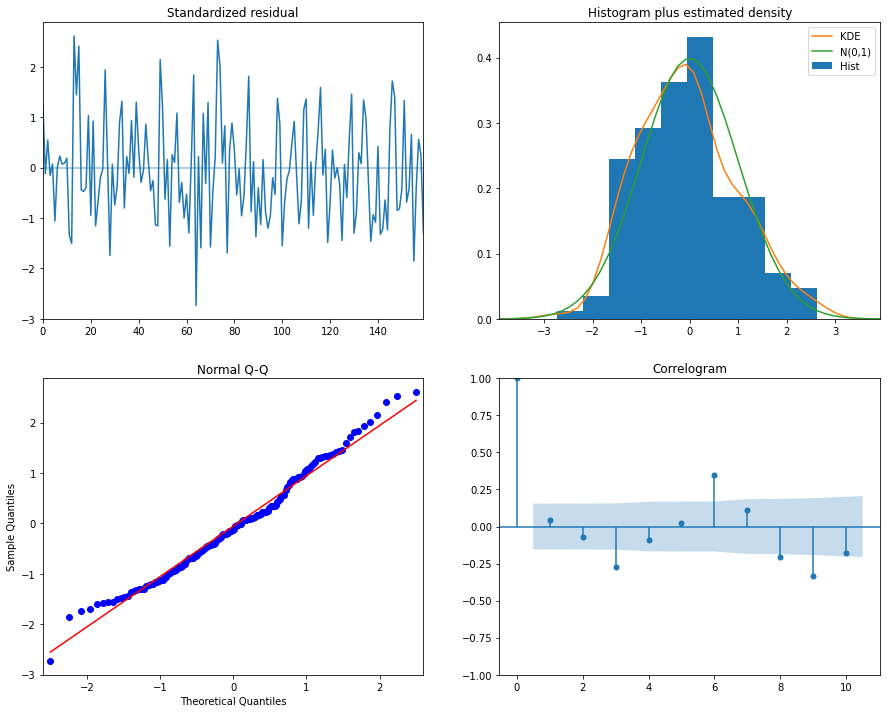

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [15]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = list(itertools.product(p, d, q, [12]))
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [16]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.360574279184
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.465932811088
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2927.7162071327266
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2695.32231718419
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4259.479361221133
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4012.922621937191
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3675.4255013531447
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3114.0230156115686
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2890.475757781279
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2653.750836411334
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4206.520029695852
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3925.5304731997803
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3653.2702719999024
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3099.1118556134193
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2874.774805687276
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2642.792771835293
ARIMA(0, 1, 0)x(0, 0, 

ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3194.6973715532718
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:2982.015548613721
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3158.335438484179
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2880.3925539206093
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2636.1606900651514
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3339.454733151258
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3115.9610156036897
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:2902.758543006774
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3136.8266411445516
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:2849.0777848288376
ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:2637.480150262354


In [17]:
# ARIMA(0, 1, 2)x(0, 1, 2, 12)3 - AIC:2613.007536104474
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)

N2=12  # число точек для теста
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],order=[0,1,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:',results_opt.aic)


AIC: 2613.007536104474


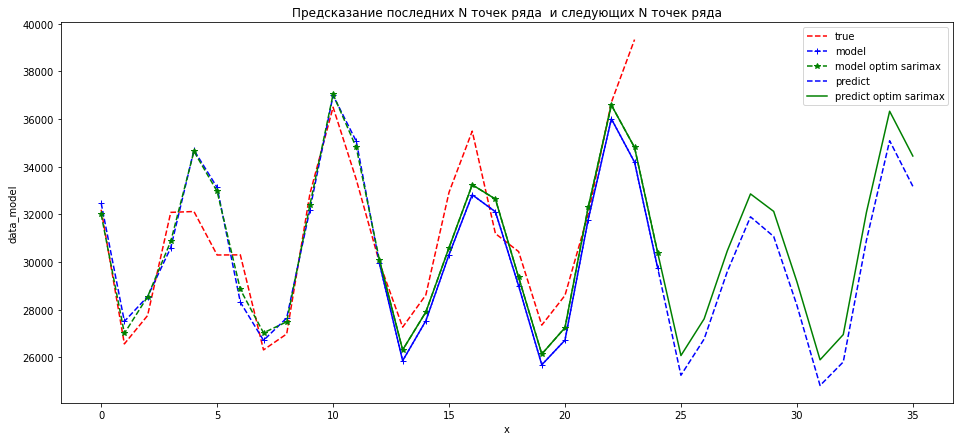

In [18]:
nforecast = N2  # полное число предиктов (тест+ чистый предикт)
N4 = 12
y_p = results.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_ps = results_opt.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_f = results.forecast(2*N2 )
y_fs = results_opt.forecast(2*N2 )

plt.figure(figsize=(16,7))
plt.plot(data_m['PJME_MW'].values[-N2*2:],'--r',label ='true')
plt.plot(range(N2-N4,N2+N4+1),y_p,'+--b',label ='model')
plt.plot(range(N2-N4,N2+N4+1),y_ps,'*--g',label ='model optim sarimax')
plt.plot(np.arange(2*N2)+N2,y_f,'--b',label ='predict')
plt.plot(np.arange(2*N2)+N2,y_fs,'g',label ='predict optim sarimax')

plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

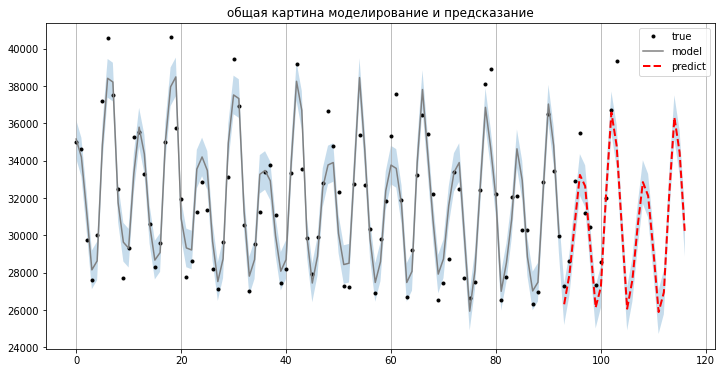

In [19]:
N3=96  # отступ данных для отображения  модели 
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N3:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.



Недельная модель не уловила сезонность, а в месячной она хорошо просматривается. При этом, месячная модель все равно не очень точна, так как теряется часть информации (например, недельные колебания) за счет укрупнения и разного количества данных в каждом месяце

-----

#### 4. Постройте ACF, PACF и модель ARIMA для BRENT (lнедельный )



In [20]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [21]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


In [22]:
brent_w = brent_data.copy().resample('W').mean()
brent_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

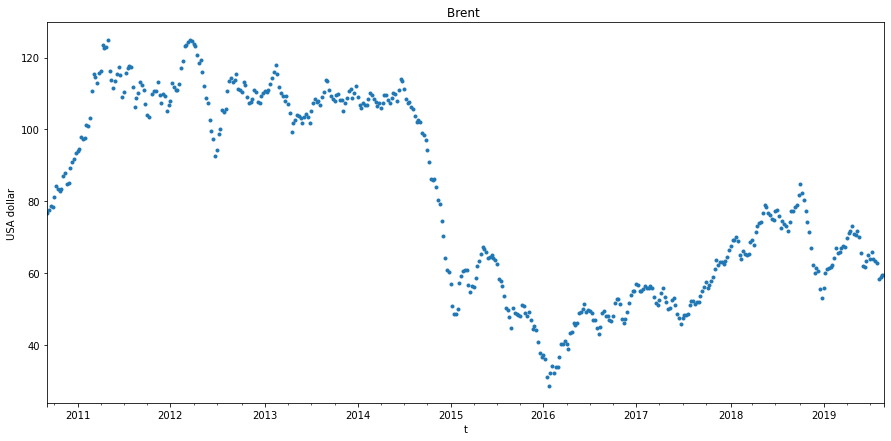

In [25]:
_ = brent_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [26]:
brent_w.head()

,Значение,year,weekofyear
Дата,,,
2010-09-05,76.616000,2010.0,35.0
2010-09-12,77.673333,2010.0,36.0
2010-09-19,78.693333,2010.0,37.0
2010-09-26,78.518333,2010.0,38.0
2010-10-03,81.211667,2010.0,39.0


In [27]:
brent_w.shape

(470, 3)

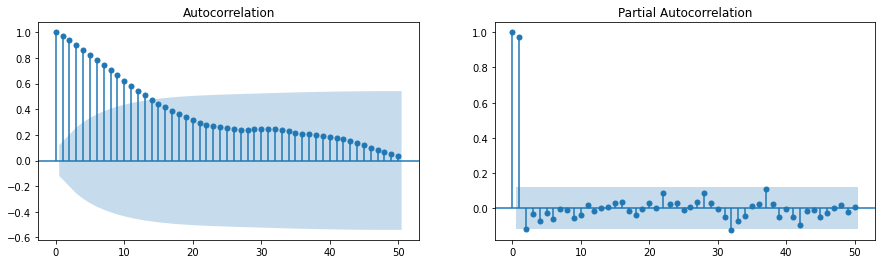

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
lag = 50
t = 200
sm.graphics.tsa.plot_acf(brent_w['Значение'][t:].values, lags=lag, ax=axes[0])
sm.graphics.tsa.plot_pacf(brent_w['Значение'][t:].values, lags=lag, ax=axes[1])
plt.show()

In [41]:
n = 12
model = ARIMA(brent_w['Значение'][t:-n], order=(0, 1, 0))
model_fitted = model.fit(disp=False)

y_pred = model_fitted.predict(len(brent_w[t:-n]), len(brent_w[t:-n]), typ='levels')
y_forecast = model_fitted.forecast(n * 2)

mean absolute percentage error: 3.31%


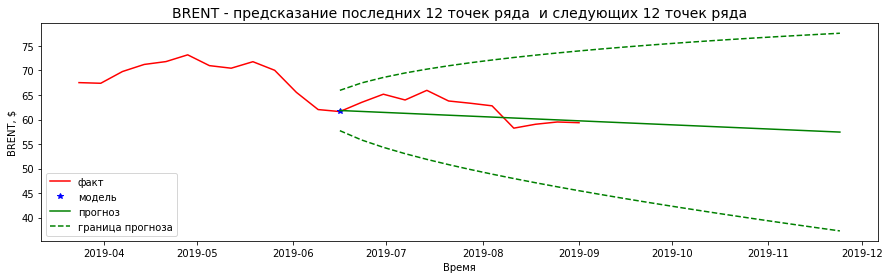

In [43]:
y_true = brent_w.iloc[-n:, 0].values
err = np.mean(np.abs((y_true - y_forecast[0][:n]) / y_true)) * 100
print(f'mean absolute percentage error: {round(err, 2)}%')

plt.figure( figsize=(15, 4))
plt.plot(brent_w.iloc[-2 * n:, 0],'r', label ='факт')
plt.plot(y_pred, '*b', label ='модель')

ind_f = pd.date_range(brent_w.index[-n], periods=n * 2, freq="W")
plt.plot(ind_f, y_forecast[0],'g',label ='прогноз')
plt.plot(ind_f, y_forecast[2][:,1],'--g', label = 'граница прогноза')
plt.plot(ind_f, y_forecast[2][:,0],'--g')

plt.xlabel('Время')
plt.ylabel('BRENT, $')
plt.title(f'BRENT - предсказание последних {n} точек ряда  и следующих {n} точек ряда', size=14)
plt.legend()
plt.show()

#### 5. Оцените результат моделирования

Модель показывает неплохой результат в 3,31%, но при этом не улавливает колебаний, просто продолжает прямой тренд.

#### 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

ARIMA плохо улавливает нестабильные данные, которые не имеют ярко выраженной цикличности. Например, данные по Brent зависят от огромного количества внешних факторов, поэтому сезонность в них либо отсутствует, либо сведена к минимуму. Поэтому модель строит прямую линию прогноза. В цикличных данных ARIMA определяет цикл и до опреденного момента его неплохо прогнозирует. 